In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [2]:
df = pd.read_csv ("application_train.csv")
df1 = pd.read_csv ("bureau.csv")
application_train_bureau = pd.merge(left=df, right=df1, how='inner', on=['SK_ID_CURR'])

In [8]:
def plot_bureau_stats(feature,label_rotation=False):
    temp = application_train_bureau[feature].value_counts()
    df2 = pd.DataFrame({feature: temp.index,'No. of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = application_train_bureau[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc['TARGET'] = cat_perc['TARGET']*100
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    
    sns.set_color_codes("pastel")
    
    s = sns.barplot(ax=ax1, x = feature, y="No. of contracts",data=df2)

    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

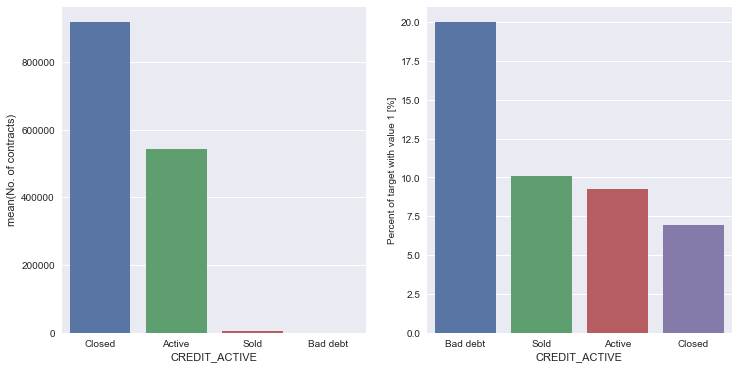

In [9]:
plot_bureau_stats('CREDIT_ACTIVE')

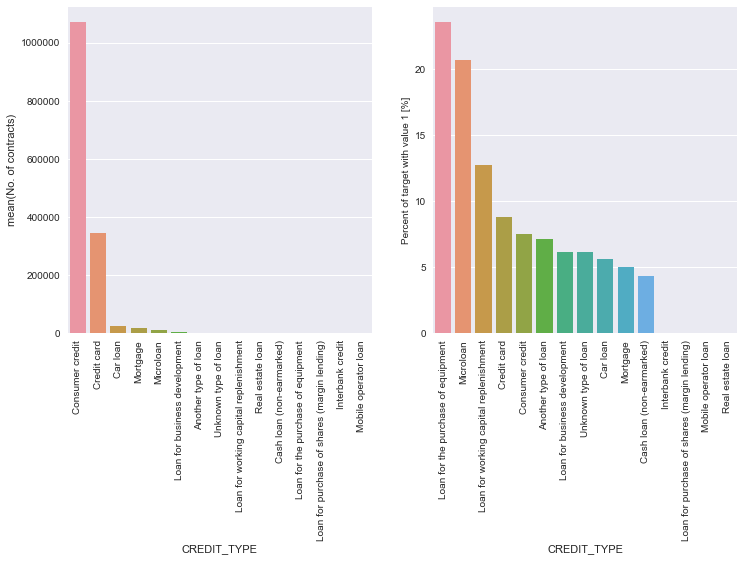

In [10]:
plot_bureau_stats('CREDIT_TYPE',True)

In [23]:
def plot_bureau_distribution(feature,color):
    
    plt.figure(figsize=(6,4))
    plt.title("Distribution of %s" % feature)
    sns.distplot(application_train_bureau[feature].dropna(),color=color, kde=True,bins=100)
    plt.show() 
    
    sns.kdeplot(application_train_bureau.loc[application_train_bureau['TARGET'] == 0, feature], label = 'target == 0', color = color)
    sns.kdeplot(application_train_bureau.loc[application_train_bureau['TARGET'] == 1, feature], label = 'target == 1', color = 'red')
    plt.title('Distribution of %s by Target Value' % feature )
    plt.xlabel(feature); 
    plt.ylabel('Density');
    plt.show()

C:\Users\Manas\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


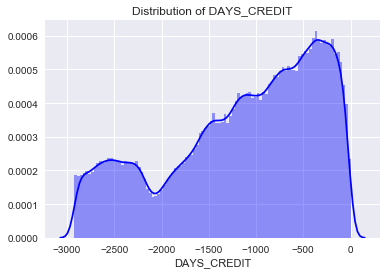

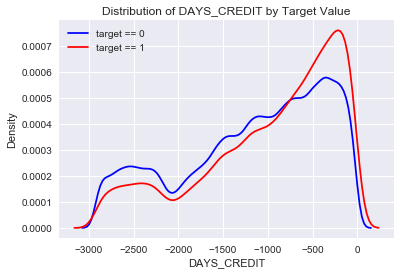

In [24]:
plot_bureau_distribution('DAYS_CREDIT','blue')

C:\Users\Manas\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


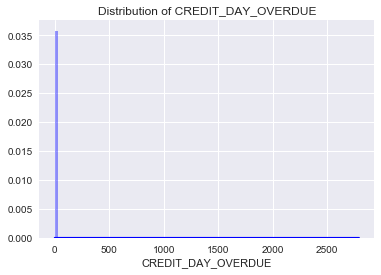

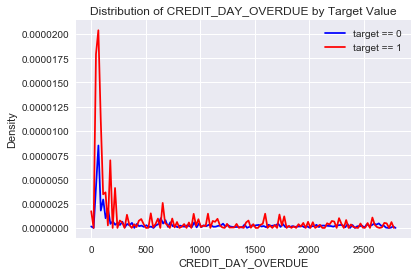

In [25]:
plot_bureau_distribution('CREDIT_DAY_OVERDUE','blue')

In [59]:
def plot_application_train_stats(feature,label_rotation=False):
    temp = df[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = df[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
 
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1%', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

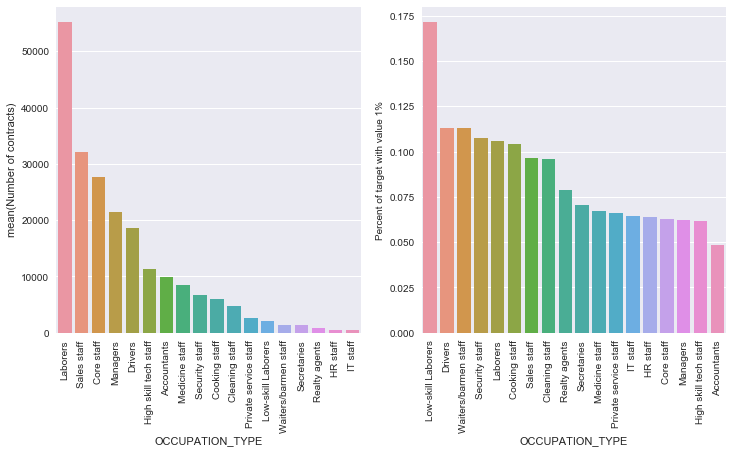

In [60]:
plot_application_train_stats('OCCUPATION_TYPE',True)

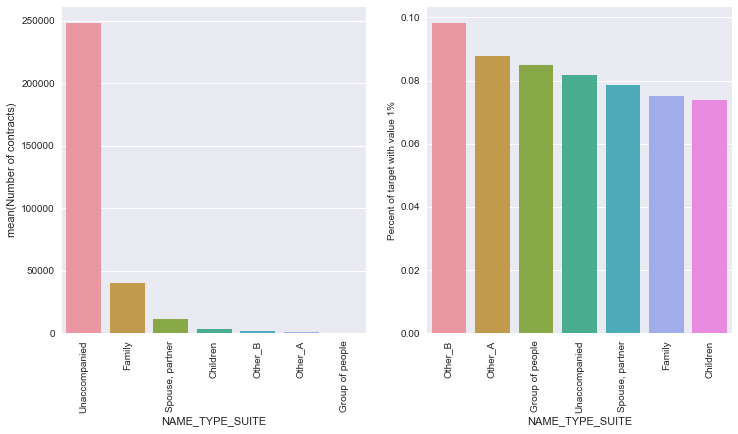

In [62]:
plot_application_train_stats('NAME_TYPE_SUITE',True)

In [63]:
def plot_application_train_distribution(feature,color):
    
    plt.figure(figsize=(6,4))
    plt.title("Distribution of %s" % feature)
    sns.distplot(df[feature].dropna(),color=color, kde=True,bins=100)
    plt.show() 
    
    sns.kdeplot(df.loc[application_train_bureau['TARGET'] == 0, feature], label = 'target == 0', color = color)
    sns.kdeplot(df.loc[application_train_bureau['TARGET'] == 1, feature], label = 'target == 1', color = 'red')
    plt.title('Distribution of %s by Target Value' % feature )
    plt.xlabel(feature); 
    plt.ylabel('Density');
    plt.show()

C:\Users\Manas\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


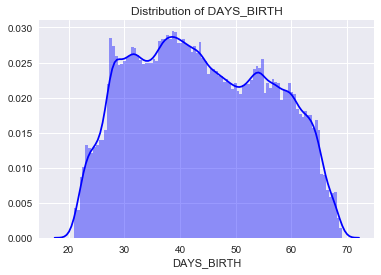

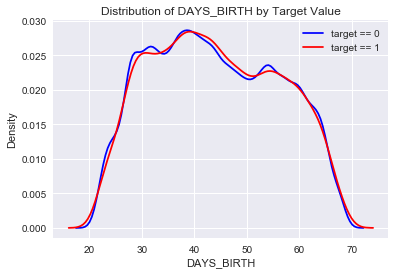

In [66]:
df2 = df
df2['DAYS_BIRTH'] = (-df2['DAYS_BIRTH']/365.0)
plot_application_train_distribution('DAYS_BIRTH','blue')

C:\Users\Manas\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


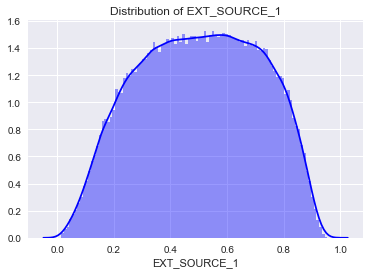

C:\Users\Manas\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\Manas\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


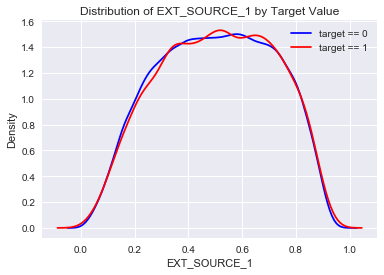

In [67]:
plot_application_train_distribution('EXT_SOURCE_1','blue')

C:\Users\Manas\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


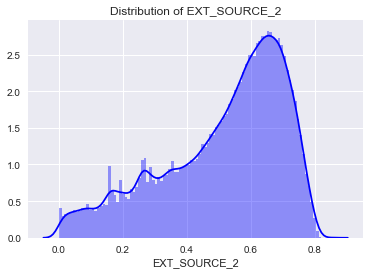

C:\Users\Manas\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\Manas\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


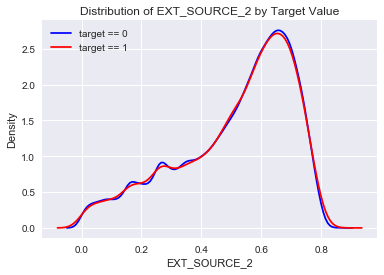

In [68]:
plot_application_train_distribution('EXT_SOURCE_2','blue')

C:\Users\Manas\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


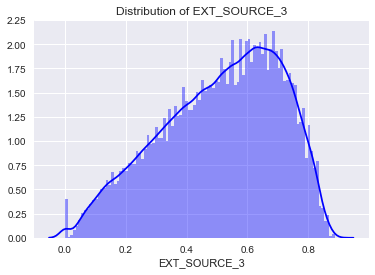

C:\Users\Manas\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\Manas\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


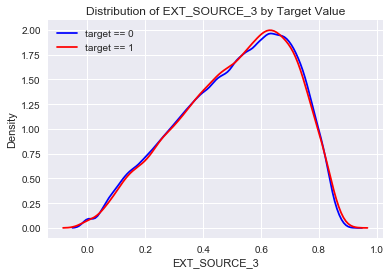

In [70]:
plot_application_train_distribution('EXT_SOURCE_3','blue')

In [2]:
df3 = pd.read_csv ("app_train.csv")
df4 = pd.read_csv ("credit_card_balance.csv")
application_train_credit_card = pd.merge(left=df3, right=df4, how='inner', on=['SK_ID_CURR'])

In [3]:
application_train_credit_card.head()

,SK_ID_CURR,TARGET,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,100006,0,1489396,-2,0.0,270000,NaN,0.0,NaN,NaN,...,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0
1,100006,0,1489396,-1,0.0,270000,NaN,0.0,NaN,NaN,...,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0
2,100006,0,1489396,-5,0.0,270000,NaN,0.0,NaN,NaN,...,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0
3,100006,0,1489396,-3,0.0,270000,NaN,0.0,NaN,NaN,...,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0
4,100006,0,1489396,-4,0.0,270000,NaN,0.0,NaN,NaN,...,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0


In [7]:
df4['NAME_CONTRACT_STATUS'].value_counts()

Active           3698436
Completed         128918
Signed             11058
Demand              1365
Sent proposal        513
Refused               17
Approved               5
Name: NAME_CONTRACT_STATUS, dtype: int64

In [14]:
def plot_credit_card_stats(feature,label_rotation=False):
    temp = application_train_credit_card[feature].value_counts()
    df5 = pd.DataFrame({feature: temp.index,'No. of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = application_train_credit_card[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc['TARGET'] = cat_perc['TARGET']*100
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    
    sns.set_color_codes("pastel")
    
    s = sns.barplot(ax=ax1, x = feature, y="No. of contracts",data=df5)

    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1%', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

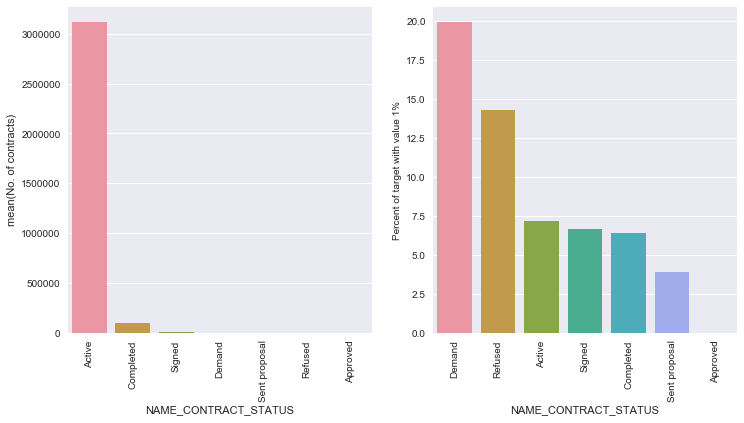

In [15]:
plot_credit_card_stats('NAME_CONTRACT_STATUS',True)

In [16]:
def plot_credit_card_distribution(feature,color):
    
    plt.figure(figsize=(6,4))
    plt.title("Distribution of %s" % feature)
    sns.distplot(application_train_credit_card[feature].dropna(),color=color, kde=True,bins=100)
    plt.show() 
    
    sns.kdeplot(application_train_credit_card.loc[application_train_credit_card['TARGET'] == 0, feature], label = 'target == 0', color = color)
    sns.kdeplot(application_train_credit_card.loc[application_train_credit_card['TARGET'] == 1, feature], label = 'target == 1', color = 'red')
    plt.title('Distribution of %s by Target Value' % feature )
    plt.xlabel(feature); 
    plt.ylabel('Density');
    plt.show()

C:\Users\Manas\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


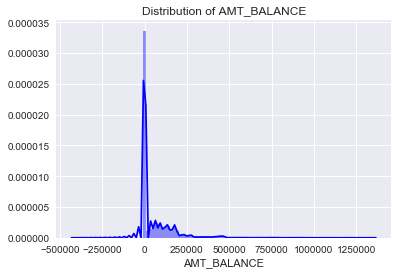

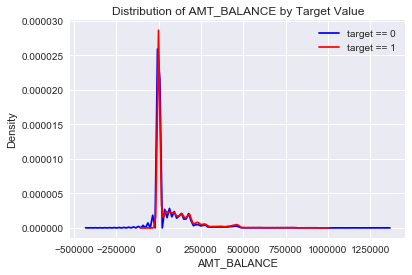

In [24]:
plot_credit_card_distribution('AMT_BALANCE','blue')


In [36]:
df4['AMT_BALANCE'].max()

1505902.1850000001

C:\Users\Manas\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


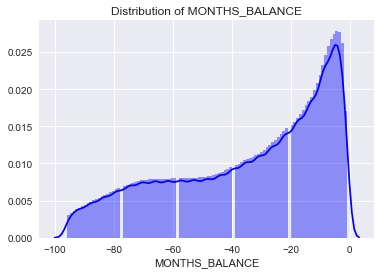

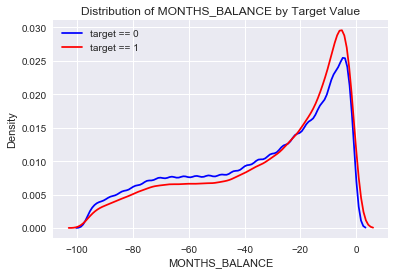

In [20]:
plot_credit_card_distribution('MONTHS_BALANCE','blue')

C:\Users\Manas\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


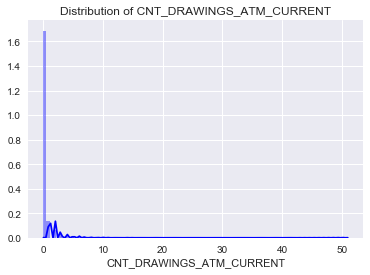

C:\Users\Manas\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\Manas\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


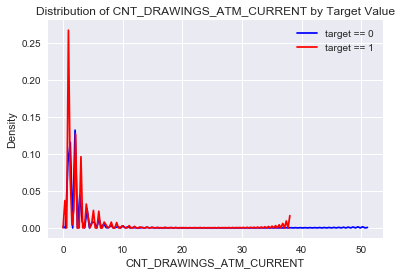

In [46]:
plot_credit_card_distribution('CNT_DRAWINGS_ATM_CURRENT','blue')


In [48]:
df4['CNT_DRAWINGS_ATM_CURRENT'].value_counts()

0.0     2665718
1.0      213460
2.0       95647
3.0       46730
4.0       26335
5.0       14910
6.0        9179
7.0        5718
8.0        3992
9.0        2427
10.0       1876
11.0       1164
12.0        826
13.0        604
14.0        442
15.0        345
16.0        274
17.0        188
18.0        157
19.0        112
20.0         96
21.0         66
22.0         49
23.0         32
24.0         24
25.0         20
27.0         17
28.0         15
29.0         12
26.0         12
31.0         11
30.0          9
33.0          5
34.0          4
35.0          4
38.0          3
36.0          3
41.0          2
39.0          2
37.0          2
43.0          1
32.0          1
51.0          1
44.0          1
Name: CNT_DRAWINGS_ATM_CURRENT, dtype: int64